# Our World in Data - Philippine COVID Data 

This is a simple analysis of COVID-19 Cases in the Philippines from 2020-01-30 to 2022-05-02  coming from Our World in Data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("owid-covid-data.csv", header=None, names=["Date", "New Cases"])

df["Date"] = pd.to_datetime(df["Date"], format='%Y/%m/%d')
df["Total Cases"] = df["New Cases"].cumsum()
df[-7:] # Last 7 rows

,Date,New Cases,Total Cases
817,2022-04-26,123.0,3685189.0
818,2022-04-27,194.0,3685383.0
819,2022-04-28,193.0,3685576.0
820,2022-04-29,181.0,3685757.0
821,2022-04-30,240.0,3685997.0
822,2022-05-01,252.0,3686249.0
823,2022-05-02,187.0,3686436.0


### Cases of COVID-19
The following are graphs of the number of new cases of COVID-19 per day and the cumulative number of cases each day. The massive spikes in covid cases as the country went through COVID waves are evident in the spikes on the first graph and the seemingly abrupt increases in the second graph. 

Notable months where spikes occured include around August or September of 2020, April of 2021, September of 2021, and January or February of 2022.

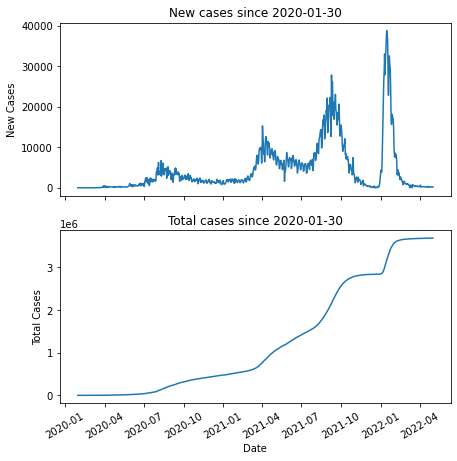

In [4]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 7))

sns.set_palette("colorblind")

sns.lineplot(x="Date", y="New Cases", ax=ax0, data=df)
ax0.set(xlabel="Date", ylabel="New Cases", title="New cases since 2020-01-30")

sns.lineplot(x="Date", y="Total Cases", ax=ax1, data=df)
ax1.set(xlabel="Date", ylabel="Total Cases", title="Total cases since 2020-01-30")

plt.xticks(rotation=30)
plt.show()

### 7-Day Moving Average of COVID-19 Cases
Beyond simply graphing the number of new cases per day, the 7-day moving average can also be taken which provides a mean line that is relatively less affected by day-to-day variations. This still provides the general trend of the data but in a much cleaner way.

Calculating the 7-day moving average is done by taking the mean of the previous three days, the succeeding three days, and the current day. This means that the 7-day moving average will only be limited to the dates that have all the needed data points for computation. The result for the first 7 rows is as follows.

In [16]:
df["7DMA"] = df["New Cases"].rolling(window=7, center=True).mean()
df[:7] # First 7 rows

,Date,New Cases,Total Cases,7DMA
817,2022-04-26,123.0,3685189.0,187.000000
818,2022-04-27,194.0,3685383.0,191.857143
819,2022-04-28,193.0,3685576.0,199.285714
820,2022-04-29,181.0,3685757.0,195.714286
821,2022-04-30,240.0,3685997.0,NaN
822,2022-05-01,252.0,3686249.0,NaN
823,2022-05-02,187.0,3686436.0,NaN


The following are graphs of the 7-day moving average for the number of new cases of COVID-19 per day. The left graph shows only the 7-day moving average which shows a much cleaner graph while still able to represent the peaks in number of daily cases discussed earlier.

For comparison, the line graph generated on the left is affixed on top of the line graph generated earlier showing the number of cases per day along with the 7-day moving average in one graph.

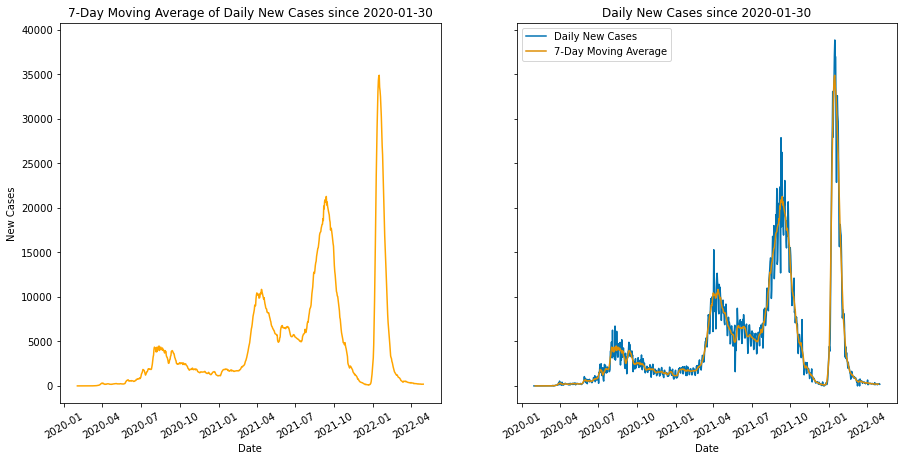

In [15]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(15,7))


sns.lineplot(x="Date", y="7DMA", ax=ax0, data=df, color="orange")
ax0.set(xlabel="Date", ylabel="New Cases", title="7-Day Moving Average of Daily New Cases since 2020-01-30")

sns.lineplot(x="Date", y="value", hue="variable", ax=ax1,
             data=pd.melt(df[["Date", "New Cases", "7DMA"]], ['Date']))
ax1.set(xlabel="Date", ylabel="New Cases", title="Daily New Cases since 2020-01-30")

ax0.tick_params(axis='x', labelrotation=30)
ax1.tick_params(axis='x', labelrotation=30)

plt.legend(labels=["Daily New Cases", "7-Day Moving Average"])
plt.show()

### Conclusion
The graphs were able to indicate trends in COVID-19 cases, specifically they represented the peaks in cases since January of 2020. Moreover, it was also shown that the 7-Day Moving Average of daily COVID-19 cases is a sufficient representation of these spikes in cases while maintaining a cleaner graph as the line is less suceptible to day-to-day changes. Instead, the line shows the general trend covering 7 days total.

Further analysis could be conducted and more insights could be taken if this data is accompanied by other data points or if data at a regional level could be taken.

### References
1. Data Set distributed by: Our World in Data. "Coronavirus (COVID-19) Cases." https://ourworldindata.org/covid-cases FROM COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. https://github.com/CSSEGISandData/COVID-19. 
2. Georgia Rural Health Innovation Center (2020). "What is moving average, and why is it useful?" https://www.georgiaruralhealth.org/blog/what-is-a-moving-average-and-why-is-it-useful/